# 📊 Análise Exploratória de Dados de da Rede Sonda 🌦️

## 📌 Introdução
Este notebook realiza uma análise exploratória dos dados meteorológicos coletados de diversas estações. O objetivo é entender a estrutura dos dados, avaliar sua qualidade e identificar padrões relevantes.

## 📂 Fonte dos Dados
- Arquivos CSV formatados armazenados no ftp
- Contêm medições de variáveis meteorológicas, solarimétricas e cameras.

## 🔍 Objetivos da Análise
1. **Carregar e explorar os dados**: verificar onde os dados estão armazenados, seu formato e estrutura.
2. **Dimensionamento e variáveis disponíveis**: entender o tamanho dos arquivos, número de registros e colunas.
3. **Análise temporal dos dados disponíveis**: identificar o período coberto e eventuais lacunas temporais.
4. **Visualização da distribuição espacial das estações**: verificar a abrangência geográfica das medições.
5. **Exploração inicial de distribuições**: histogramas e estatísticas básicas das variáveis.
6. **Análise de qualidade dos dados** *(última etapa)*: identificar valores ausentes, inconsistências e flags de qualidade.

### 1. Carregar e Explorar os Dados
Vamos começar listando o tamanho da base de dados que estão no diretório do ftp.

In [1]:
# Diretório onde os arquivos estão localizados
DIRETORIO = '/media/helvecioneto/Barracuda/sonda/'

In [2]:
# Exibe o tamanho de cada arquivo no diretório ordenado por tamanho de forma decrescente
!du -h --max-depth=1 {DIRETORIO + "novos_formatados/"} | sort -rh

18G	/media/helvecioneto/Barracuda/sonda/novos_formatados/
1,8G	/media/helvecioneto/Barracuda/sonda/novos_formatados/PMA
1,7G	/media/helvecioneto/Barracuda/sonda/novos_formatados/PTR
1,6G	/media/helvecioneto/Barracuda/sonda/novos_formatados/SMS
1,4G	/media/helvecioneto/Barracuda/sonda/novos_formatados/CPA
1,2G	/media/helvecioneto/Barracuda/sonda/novos_formatados/BRB
1,1G	/media/helvecioneto/Barracuda/sonda/novos_formatados/ORN
989M	/media/helvecioneto/Barracuda/sonda/novos_formatados/FLN
848M	/media/helvecioneto/Barracuda/sonda/novos_formatados/CGR
837M	/media/helvecioneto/Barracuda/sonda/novos_formatados/CTS
759M	/media/helvecioneto/Barracuda/sonda/novos_formatados/JOI
749M	/media/helvecioneto/Barracuda/sonda/novos_formatados/NAT
686M	/media/helvecioneto/Barracuda/sonda/novos_formatados/SLZ
547M	/media/helvecioneto/Barracuda/sonda/novos_formatados/MDS
521M	/media/helvecioneto/Barracuda/sonda/novos_formatados/STM
464M	/media/helvecioneto/Barracuda/sonda/novos_formatados/SBR
445M	/media/

Existem 3 tipos de dados:
- Dados Meteorológicos
- Dados Solarimétricos
- Dados Anemometricos

Abaixo vamos adicionar cada tipo de dado em uma lista para facilitar a análise.

Utilizaremos a biblioteca duckdb para realizar a análise dos dados. DuckDB funciona como um banco de dados SQL, mas em memória, o que facilita a análise de grandes volumes de dados.

In [3]:
# Importar a biblioteca DuckDB para manipulação de dados
import os
import duckdb
import pandas as pd

In [4]:
# Apontar o caminho das bases de dados
ARQV_METEOROLOGICO = DIRETORIO + 'dados_meteorologicos.parquet'
ARQV_SOLARIMETRICA = DIRETORIO + 'dados_solarimetricos.parquet'
ARQV_ANEMOMETRICO = DIRETORIO + 'dados_anemometricos.parquet'

# Nome das tabelas
BASE_METEOROLOGICO = 'base_meteorologica'
BASE_SOLARIMETRICA = 'base_solarimetrica'
BASE_ANEMOMETRICO = 'base_anemometrica'

In [5]:
# Cria variavel para conexão do banco de dados
global con
con = duckdb.connect(database=':memory:')
!rm -rf .tmp

In [8]:
con.execute(f"""CREATE TABLE IF NOT EXISTS {BASE_METEOROLOGICO} AS \
            SELECT * FROM read_parquet('{ARQV_METEOROLOGICO}')""")

con.execute(f"""CREATE TABLE IF NOT EXISTS {BASE_SOLARIMETRICA} AS \
            SELECT * FROM read_parquet('{ARQV_SOLARIMETRICA}')""")

con.execute(f"""CREATE TABLE IF NOT EXISTS {BASE_ANEMOMETRICO} AS \
            SELECT * FROM read_parquet('{ARQV_ANEMOMETRICO}')""")

In [9]:
display(con.execute(f"SELECT * FROM {BASE_METEOROLOGICO} LIMIT 5").fetch_df())

,acronym,timestamp,year,day,min,tp_sfc,humid_sfc,press,rain,ws10_avg,ws10_std,wd10_avg,wd10_std
0,FLN,2019-03-01 00:00:00,2019,60,0,22.379999,97.699997,1010.283997,0.72,5.2698,0.923294,23.422167,4.079195
1,FLN,2019-03-01 00:10:00,2019,60,10,21.219999,101.099998,1010.502991,0.00,4.6318,0.352908,29.199734,1.963143
2,FLN,2019-03-01 00:20:00,2019,60,20,21.150000,101.099998,1010.476013,0.18,3.9738,0.713510,33.528019,2.825004
3,FLN,2019-03-01 00:30:00,2019,60,30,21.080000,101.099998,1010.473999,0.00,3.1440,0.646525,22.548946,3.690781
4,FLN,2019-03-01 00:40:00,2019,60,40,21.200001,101.099998,1010.629028,0.00,0.8769,0.440114,58.076206,8.977480


In [10]:
display(con.execute(f"SELECT * FROM {BASE_SOLARIMETRICA} LIMIT 5").fetch_df())

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,lw_calc_min,lw_raw_avg,lw_raw_std,lw_raw_max,lw_raw_min,tp_glo,tp_dir,tp_dif,tp_lw_dome,tp_lw_case
0,FLN,2019-04-01 00:00:00,2019,91,0,-1.786,0.135,-1.397,-2.196,-2.651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FLN,2019-04-01 00:01:00,2019,91,1,-1.808,0.124,-1.397,-2.196,-2.647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FLN,2019-04-01 00:02:00,2019,91,2,-1.815,0.145,-1.397,-2.196,-2.647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FLN,2019-04-01 00:03:00,2019,91,3,-1.800,0.136,-1.397,-2.196,-2.647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FLN,2019-04-01 00:04:00,2019,91,4,-1.797,0.163,-1.397,-2.196,-2.666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
display(con.execute(f"SELECT * FROM {BASE_ANEMOMETRICO} LIMIT 5").fetch_df())

,acronym,timestamp,year,day,min,ws10_avg,ws10_std,ws10_min,ws10_max,wd10_avg,...,wd25_avg,wd25_std,tp_25,ws50_avg,ws50_std,ws50_min,ws50_max,wd50_avg,wd50_std,tp_50
0,ORN,2021-01-01 00:00:00,-5555,1,-5555,3.036001,0.692576,1.43,4.90,340.277008,...,338.134003,11.51842,21.500050,3.973298,-5555.0,2.33,6.32,344.615692,9.944590,21.351320
1,ORN,2021-01-01 00:10:00,-5555,1,-5555,3.063534,0.634577,1.85,4.74,342.141602,...,342.613007,10.23149,21.540030,4.155813,-5555.0,2.85,6.18,347.026886,9.513543,21.391270
2,ORN,2021-01-01 00:20:00,-5555,1,-5555,3.067666,0.664677,1.74,4.78,347.539215,...,346.913208,10.26602,21.526489,3.938734,-5555.0,2.07,5.82,352.226288,8.289485,21.364031
3,ORN,2021-01-01 00:30:00,-5555,1,-5555,2.389133,0.479149,1.13,3.98,351.191895,...,348.663391,10.63647,21.368370,3.494213,-5555.0,2.23,5.37,353.262604,7.491448,21.194250
4,ORN,2021-01-01 00:40:00,-5555,1,-5555,2.308198,0.641427,0.97,4.39,338.063690,...,339.783508,10.89829,21.061411,3.401835,-5555.0,1.62,5.32,345.010986,8.325338,20.832430


In [18]:
def verifica_temporal(base):
    # Faz um agrupamento por acronym e timestamp para verificar se os dados são temporais, fazendo a contagem de registros por dia
    query = f"""
    SELECT acronym, DATE_TRUNC('month', timestamp) AS data, COUNT(*) AS registros
    FROM {base}
    GROUP BY acronym, data
    ORDER BY data
    """
    return con.execute(query).fetch_df()

In [21]:
temporal_solar = verifica_temporal(BASE_SOLARIMETRICA)

In [27]:
temporal_solar

,acronym,data,registros
0,SBR,2004-01-01,44640
1,SBR,2004-02-01,41760
2,CGR,2004-02-01,41760
3,CGR,2004-03-01,44640
4,SBR,2004-03-01,44640
...,...,...,...
1561,NAT,2025-04-01,2460
1562,PMA,2025-04-01,2470
1563,ORN,2025-04-01,2470
1564,CPA,2025-04-01,460


<Axes: title={'center': 'Contagem de registros por mês - Dados Solarimétricos'}, xlabel='Data', ylabel='Contagem de Registros'>

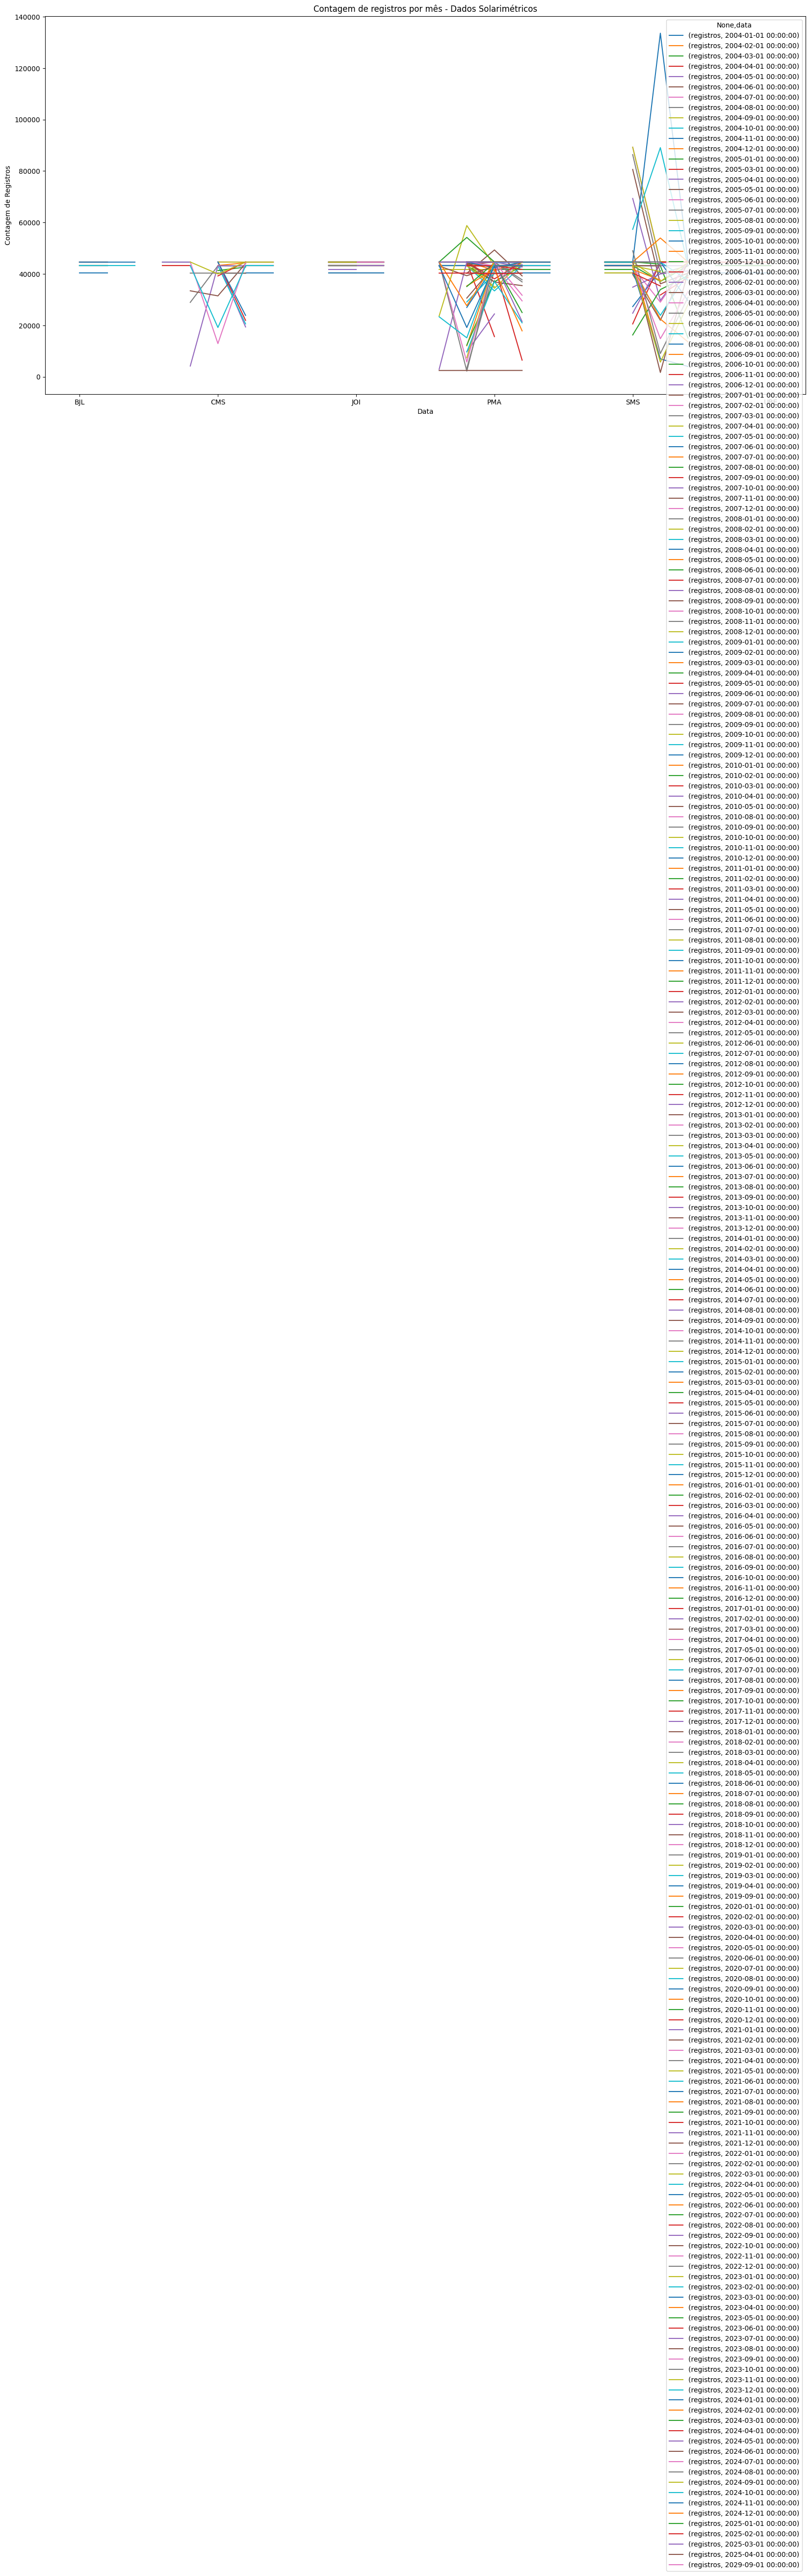

In [20]:
verifica_temporal(BASE_SOLARIMETRICA).set_index(['acronym', 'data']).unstack().plot(
    figsize=(20, 10),
    title='Contagem de registros por mês - Dados Solarimétricos',
    xlabel='Data',
    ylabel='Contagem de Registros'
)

In [10]:
# Função para criar a tabela no banco de dados e inicializa todas as variáveis vazias
def criar_base(arquivo, nome_base, variaveis):
    # Verifica se o arquivo existe, se sim carrega o arquivo
    if os.path.exists(arquivo):
        con.execute(f"""
            CREATE TABLE IF NOT EXISTS {nome_base} AS SELECT * FROM read_csv_auto('{arquivo}')
        """)
    else:
        # Criar a string com os nomes das colunas e os tipos corretos
        columns_def = ', '.join(
            f"{col} VARCHAR" if col == "acronym" else
            f"{col} TIMESTAMP" if col == "timestamp" else
            f"{col} INT" if col in ["year", "day", "min"] else
            f"{col} FLOAT" 
            for col in variaveis        )
        
        # Criar a tabela
        con.execute(f"""
            CREATE TABLE IF NOT EXISTS {nome_base} ({columns_def})
        """)

In [11]:
# Criar a base de dados meteorológicos
criar_base(ARQV_METEOROLOGICO, BASE_METEOROLOGICO, METEO_VAR)
# Criar a base de dados solarimétricos
criar_base(ARQV_SOLARIMETRICA, BASE_SOLARIMETRICA, SOLAR_VAR)
# Criar a base de dados anemométricos
criar_base(BASE_ANEMOMETRICO, BASE_ANEMOMETRICO, ANEMO_VAR)

In [35]:
# Verifica o conteudo da tabela base_meteorologica
display(con.execute(f"SELECT * FROM {BASE_METEOROLOGICO} LIMIT 5").fetch_df())
# Verifica o conteudo da tabela base_solarimetrica
display(con.execute(f"SELECT * FROM {BASE_SOLARIMETRICA} LIMIT 5").fetch_df())
# Verifica o conteudo da tabela base_anemometrica
display(con.execute(f"SELECT * FROM {BASE_ANEMOMETRICO} LIMIT 5").fetch_df())

,acronym,timestamp,year,day,min,tp_sfc,humid_sfc,press,rain,ws10_avg,ws10_std,wd10_avg,wd10_std
0,FLN,2019-03-01 00:00:00,2019,60,0,22.379999,97.699997,1010.283997,0.72,5.2698,0.923294,23.422167,4.079195
1,FLN,2019-03-01 00:10:00,2019,60,10,21.219999,101.099998,1010.502991,0.00,4.6318,0.352908,29.199734,1.963143
2,FLN,2019-03-01 00:20:00,2019,60,20,21.150000,101.099998,1010.476013,0.18,3.9738,0.713510,33.528019,2.825004
3,FLN,2019-03-01 00:30:00,2019,60,30,21.080000,101.099998,1010.473999,0.00,3.1440,0.646525,22.548946,3.690781
4,FLN,2019-03-01 00:40:00,2019,60,40,21.200001,101.099998,1010.629028,0.00,0.8769,0.440114,58.076206,8.977480


,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,lw_calc_min,lw_raw_avg,lw_raw_std,lw_raw_max,lw_raw_min,tp_glo,tp_dir,tp_dif,tp_lw_dome,tp_lw_case


,acronym,timestamp,year,day,min,ws10_avg,ws10_std,ws10_min,ws10_max,wd10_avg,...,wd25_avg,wd25_std,tp_25,ws50_avg,ws50_std,ws50_min,ws50_max,wd50_avg,wd50_std,tp_50


In [ ]:
# Função para popular a tabela com os dados, nessa função será possível fazer o append dos dados, atualizar os dados variavel a variavel
def popular_base(args):
    arquivo, base, linha_linha, var_var, sobreescrever = args

    # Le o arquivo CSV e insere os dados na tabela correspondente
    try:
        # Lendo os dados do CSV, pulando a segunda linha que contém informações extras
        new_data = pd.read_csv(arquivo, skiprows=[1])
        
        # Coluna de variáveis (todas as colunas após as primeiras 5 que são metadados)
        variaveis = new_data.columns[5:]
        
        # Limpeza de dados: substituir vírgulas por pontos em dados numéricos
        new_data[variaveis] = new_data[variaveis].replace({',': '.'}, regex=True)
        
        # Substituir valores como "xxx-" por 0 (dados inválidos)
        new_data[variaveis] = new_data[variaveis].replace({r'\d+-': '0'}, regex=True)
        
        # Converter todos os dados para numérico quando possível
        new_data[variaveis] = new_data[variaveis].apply(pd.to_numeric, errors='coerce')
        
        # Formatar corretamente o timestamp
        new_data['timestamp'] = pd.to_datetime(new_data['timestamp'], errors='coerce')
        
        # Verificar se há dados inválidos na coluna timestamp
        invalid_timestamps = new_data['timestamp'].isna().sum()
        if invalid_timestamps > 0:
            print(f"Aviso: {invalid_timestamps} timestamps inválidos encontrados no arquivo {arquivo}")
        
        # Verificar se o acronimo é válido
        if 'acronym' not in new_data.columns or new_data['acronym'].isna().all():
            print(f"Erro: Arquivo {arquivo} não possui informação de estação (acronym)")
            return
            
        estacao = new_data['acronym'].iloc[0]
        
        # Pega o intervalo de tempo do arquivo
        tempo = (new_data['timestamp'].min(), new_data['timestamp'].max())
        
        # Registra o DataFrame no DuckDB para operações
        con.register('new_data', new_data)
        
        # Se for para sobreescrever, exclui os dados existentes
        if sobreescrever:
            con.execute(f"DELETE FROM {base} WHERE acronym = '{estacao}' AND timestamp BETWEEN '{tempo[0]}' AND '{tempo[1]}'")
        
        # Inserção linha a linha e variável a variável (modo mais detalhado)
        if linha_linha:
            for i in range(len(new_data)):
                row = new_data.iloc[i]
                
                # Modo variável a variável
                if var_var:
                    for v in variaveis:
                        # Verifica se o registro já existe na base
                        if not sobreescrever:
                            exists = con.execute(
                                f"SELECT COUNT(*) FROM {base} WHERE acronym = '{estacao}' AND timestamp = '{row['timestamp']}' AND {v} = {row[v]}"
                            ).fetchone()[0]
                            
                            if exists > 0:
                                continue
                                
                        # Inserção de dados variável por variável
                        try:
                            con.execute(
                                f"INSERT INTO {base} (acronym, timestamp, year, day, min, {v}) VALUES ('{estacao}', '{row['timestamp']}', {row['year']}, {row['day']}, {row['min']}, {row[v]})"
                            )
                        except Exception as e:
                            print(f"Erro ao inserir variável {v} na base {base}: {e}")
                else:
                    # Verifica se o registro linha a linha já existe
                    if not sobreescrever:
                        exists = con.execute(
                            f"SELECT COUNT(*) FROM {base} WHERE acronym = '{estacao}' AND timestamp = '{row['timestamp']}'"
                        ).fetchone()[0]
                        
                        if exists > 0:
                            continue
                            
                    # Inserção de dados linha a linha
                    try:
                        con.execute(f"INSERT INTO {base} SELECT * FROM new_data WHERE timestamp = '{row['timestamp']}'")
                    except Exception as e:
                        print(f"Erro ao inserir linha na base {base}: {e}")
        else:
            # Verificação de dados existentes para inserção em lote
            if not sobreescrever:
                count = con.execute(
                    f"SELECT COUNT(*) FROM {base} WHERE acronym = '{estacao}' AND timestamp BETWEEN '{tempo[0]}' AND '{tempo[1]}'"
                ).fetchone()[0]
                
                if count > 0:
                    print(f"Dados já existem para estação {estacao} no período {tempo[0]} a {tempo[1]}. Use sobreescrever=True para substituir.")
                    return
            
            # Inserir todos os dados de uma vez
            try:
                con.execute(f"INSERT INTO {base} SELECT * FROM new_data")
                print(f"Inseridos {len(new_data)} registros na base {base} para estação {estacao}")
            except Exception as e:
                print(f"Erro ao inserir dados na base {base} do arquivo {arquivo}: {e}")
    
    except Exception as e:
        print(f"Erro ao processar arquivo {arquivo}: {e}")


Inseridos 4464 registros na base base_meteorologica para estação FLN


,acronym,timestamp,year,day,min,tp_sfc,humid_sfc,press,rain,ws10_avg,ws10_std,wd10_avg,wd10_std
0,FLN,2019-03-01 00:00:00,2019,60,0,22.379999,97.699997,1010.283997,0.72,5.2698,0.923294,23.422167,4.079195
1,FLN,2019-03-01 00:10:00,2019,60,10,21.219999,101.099998,1010.502991,0.00,4.6318,0.352908,29.199734,1.963143
2,FLN,2019-03-01 00:20:00,2019,60,20,21.150000,101.099998,1010.476013,0.18,3.9738,0.713510,33.528019,2.825004
3,FLN,2019-03-01 00:30:00,2019,60,30,21.080000,101.099998,1010.473999,0.00,3.1440,0.646525,22.548946,3.690781
4,FLN,2019-03-01 00:40:00,2019,60,40,21.200001,101.099998,1010.629028,0.00,0.8769,0.440114,58.076206,8.977480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,FLN,2019-01-31 23:10:00,2019,31,1390,28.110001,72.300003,1008.625000,0.00,1.2127,0.588603,70.239052,4.574341
8924,FLN,2019-01-31 23:20:00,2019,31,1400,28.620001,70.430000,1008.927979,0.00,1.2316,0.752738,277.135406,7.986555
8925,FLN,2019-01-31 23:30:00,2019,31,1410,28.530001,74.720001,1008.989014,0.00,0.6841,0.358513,9.854651,6.379753
8926,FLN,2019-01-31 23:40:00,2019,31,1420,28.469999,72.250000,1008.833008,0.00,1.1380,0.227866,39.093452,3.959011


In [36]:
display(con.execute(f"SELECT * FROM {BASE_METEOROLOGICO}").fetch_df())

,acronym,timestamp,year,day,min,tp_sfc,humid_sfc,press,rain,ws10_avg,ws10_std,wd10_avg,wd10_std
0,FLN,2019-03-01 00:00:00,2019,60,0,22.379999,97.699997,1010.283997,0.72,5.2698,0.923294,23.422167,4.079195
1,FLN,2019-03-01 00:10:00,2019,60,10,21.219999,101.099998,1010.502991,0.00,4.6318,0.352908,29.199734,1.963143
2,FLN,2019-03-01 00:20:00,2019,60,20,21.150000,101.099998,1010.476013,0.18,3.9738,0.713510,33.528019,2.825004
3,FLN,2019-03-01 00:30:00,2019,60,30,21.080000,101.099998,1010.473999,0.00,3.1440,0.646525,22.548946,3.690781
4,FLN,2019-03-01 00:40:00,2019,60,40,21.200001,101.099998,1010.629028,0.00,0.8769,0.440114,58.076206,8.977480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,FLN,2019-01-31 23:10:00,2019,31,1390,28.110001,72.300003,1008.625000,0.00,1.2127,0.588603,70.239052,4.574341
8924,FLN,2019-01-31 23:20:00,2019,31,1400,28.620001,70.430000,1008.927979,0.00,1.2316,0.752738,277.135406,7.986555
8925,FLN,2019-01-31 23:30:00,2019,31,1410,28.530001,74.720001,1008.989014,0.00,0.6841,0.358513,9.854651,6.379753
8926,FLN,2019-01-31 23:40:00,2019,31,1420,28.469999,72.250000,1008.833008,0.00,1.1380,0.227866,39.093452,3.959011


In [ ]:
# Função para popular a base de dados
def inserir_dados(args):
    # Recebe os argumentos
    base, arquivo, linha_linha = args
    # Lendo os novos dados do CSV, pulando a segunda linha mas mantendo o cabeçalho
    new_data = pd.read_csv(arquivo, skiprows=[1])
    # Coluna de variáveis
    variaveis = new_data.columns[5:]
    # Caso alguma variável contenha "," substitui por "." em seus valores
    new_data[variaveis] = new_data[variaveis].replace({',': '.'}, regex=True)
    # Caso alguma variável conhenha um numero segido de um - substitui por 0
    new_data[variaveis] = new_data[variaveis].replace({r'\d+-': '0'}, regex=True)
    # Formata os dados forçando para que sejam númericos, e caso não seja, substitui pelo valor original
    new_data = new_data.apply(pd.to_numeric, errors='coerce').fillna(new_data)
    # Converte a coluna de timestamp para datetime
    new_data['timestamp'] = pd.to_datetime(new_data['timestamp'], errors='coerce')
    # Pega o nome da estação do arquivo
    estacao = new_data['acronym'][0]
    # Pega o tempo mínimo e máximo
    tempo = new_data['timestamp'].min(), new_data['timestamp'].max()
    # Registra o DataFrame new_data na tabela base
    con.register('new_data', new_data)
    # Verifica se é linha a linha
    if linha_linha:
       # Verifica linha a linha e variável a variável se já existe na base
        for i in range(new_data.shape[0]):
            for v in variaveis:
                if con.execute(f"SELECT COUNT(*) FROM {base} WHERE acronym = '{estacao}' AND timestamp = '{new_data['timestamp'][i]}' AND {v} = {new_data[v][i]};").fetch_df().values[0][0] == 0:
                    try:
                        con.execute(f"INSERT INTO {base} SELECT * FROM new_data WHERE acronym = '{estacao}' AND timestamp = '{new_data['timestamp'][i]}' AND {v} = {new_data[v][i]};")
                    except Exception as e:
                        print(f"Erro ao inserir dados da variável {v} na base {base} do arquivo {arquivo}")
                        print(e)
    else: # Insere todos os dados de uma vez
         # Verifica se dados já existem
        if con.execute(f"SELECT COUNT(*) FROM {base} WHERE acronym = '{estacao}' AND timestamp BETWEEN '{tempo[0]}' AND '{tempo[1]}';").fetch_df().values[0][0] > 0:
            return
        try:
            con.execute(f"INSERT INTO {base} SELECT * FROM new_data")
        except Exception as e:
            print(f"Erro ao inserir dados na base {base} do arquivo {arquivo}")
            print(e)

In [17]:
# Funções para inserir dados de forma paralela ou sequencial
def inserir_dados_paralelo(base, arquivos, linha_linha=False):
    print(f"Inserindo dados na base {base} de forma paralela")
    with Pool() as pool:
        pool.map(inserir_dados, [(base, arquivo, linha_linha) for arquivo in arquivos])
        
# Função para inserir os dados de forma sequencial
def inserir_dados_sequencial(base, arquivos, linha_linha=False):
    print(f"Inserindo dados na base {base} de forma sequencial")
    for arquivo in arquivos:
        inserir_dados((base, arquivo, linha_linha))

In [ ]:
# Popula a base de dados meteorológicos
inserir_dados_sequencial(BASE_METEOROLOGICO, dados_metereologicos, linha_linha=False)

In [19]:
# Popula a base de dados solarimétricos
inserir_dados_sequencial(BASE_SOLARIMETRICA, dados_solarimetricos, linha_linha=False)

Inserindo dados na base base_solarimetrica de forma sequencial
Erro ao inserir dados na base base_solarimetrica do arquivo /media/helvecioneto/Barracuda/sonda/novos_formatados/ORN/Solarimetricos/2021/ORN_2021_08_SD_formatado.csv
Binder Error: table base_solarimetrica has 34 columns but 38 values were supplied
Erro ao inserir dados na base base_solarimetrica do arquivo /media/helvecioneto/Barracuda/sonda/novos_formatados/ORN/Solarimetricos/2021/ORN_2021_06_SD_formatado.csv
Binder Error: table base_solarimetrica has 34 columns but 38 values were supplied
Erro ao inserir dados na base base_solarimetrica do arquivo /media/helvecioneto/Barracuda/sonda/novos_formatados/ORN/Solarimetricos/2021/ORN_2021_01_SD_formatado.csv
Binder Error: table base_solarimetrica has 34 columns but 38 values were supplied
Erro ao inserir dados na base base_solarimetrica do arquivo /media/helvecioneto/Barracuda/sonda/novos_formatados/ORN/Solarimetricos/2021/ORN_2021_12_SD_formatado.csv
Binder Error: table base_so

KeyboardInterrupt: 

In [ ]:
# Popula a base de dados anemométricos
inserir_dados_sequencial(BASE_ANEMOMETRICO, dados_anemometricos, linha_linha=False)

In [ ]:
# Salvar a base de dados meteorológicos em um arquivo parquet caso não exista
if not os.path.exists(ARQV_METEOROLOGICO):
    con.execute(f"COPY {BASE_METEOROLOGICO} TO '{ARQV_METEOROLOGICO}' (FORMAT 'parquet')")
# Salvar a base de dados solarimétricos em um arquivo parquet caso não exista
if not os.path.exists(ARQV_SOLARIMETRICA):
    con.execute(f"COPY {BASE_SOLARIMETRICA} TO '{ARQV_SOLARIMETRICA}' (FORMAT 'parquet')")
# Salvar a base de dados anemométricos em um arquivo parquet caso não exista
if not os.path.exists(ARQV_ANEMOMETRICO):
    con.execute(f"COPY {BASE_ANEMOMETRICO} TO '{ARQV_ANEMOMETRICO}' (FORMAT 'parquet')")

Com as bases de dados criadas e carregadas em memória, podemos começar a análise exploratória dos dados.

In [ ]:
# Verifica o conteudo da tabela base_meteorologica
con.execute(f"SELECT * FROM {BASE_METEOROLOGICO} LIMIT 5").fetch_df()

In [ ]:
# Verifica o conteudo da tabela base_solarimetrica
con.execute(f"SELECT * FROM {BASE_SOLARIMETRICA} LIMIT 5").fetch_df()

In [ ]:
# Pega apenas colunas de dados meteorológicos
colunas_meteoro = con.execute(f"SELECT * FROM {BASE_METEOROLOGICO} LIMIT 1").description
colunas_meteoro = [c[0] for c in colunas_meteoro[5:]]
print(f"Colunas de dados meteorológicos: {colunas_meteoro}")

# Pega apenas colunas de dados solarimétricos
colunas_solar = con.execute(f"SELECT * FROM {BASE_SOLARIMETRICA} LIMIT 1").description
colunas_solar = [c[0] for c in colunas_solar[5:]]
print(f"Colunas de dados solarimétricos: {colunas_solar}")

A primeira análise será a verificação temporal dos dados, para entender o período coberto e eventuais lacunas temporais.

In [ ]:
def verifica_temporal(base):
    # Faz um agrupamento por acronym e timestamp para verificar se os dados são temporais, fazendo a contagem de registros por dia
    query = f"""
    SELECT acronym, DATE_TRUNC('month', timestamp) AS data, COUNT(*) AS registros
    FROM {base}
    GROUP BY acronym, data
    ORDER BY data
    """
    return con.execute(query).fetch_df()

In [ ]:
# Verificar se os dados meteorológicos são temporais
verifica_temporal(BASE_METEOROLOGICO)

In [ ]:
def verificar_dados_invalidos(base, colunas): 
    query = f"""
    SELECT acronym, COUNT(*) AS total_dados,
    """
    # Para cada coluna em colunas_meteoro, criamos a parte do "dados_invalidos"
    for i, coluna in enumerate(colunas):
        query += f"""
        SUM(CASE WHEN \"{coluna}\" = 3333.0 THEN 1 ELSE 0 END) AS {coluna}_3333,
        SUM(CASE WHEN \"{coluna}\" = -5555.0 THEN 1 ELSE 0 END) AS {coluna}_minus_5555,
        """
    # Remover a última vírgula da consulta
    query = query.rstrip(",\n")
    # Adiciona a parte do FROM e GROUP BY
    query += f"""
    FROM \"{base}\"
    GROUP BY acronym
    """
    # Executar a query
    df = con.execute(query).fetch_df()
    return df

In [ ]:
verificar_dados_invalidos(BASE_METEOROLOGICO, colunas_meteoro)

In [ ]:
verificar_dados_invalidos(BASE_SOLARIMETRICA, colunas_solar)